# Menganalisis Risiko Gagal Bayar Peminjam

Projek ini akan menganalisis kemungkinan kegagalan bayar pinjaman kartu kredit bank berdasarkan status perkawinan seorang nasabah dan jumlah anak yang dimilikinya. Data yang dipakai adalah data mengenai kelayakan kredit nasabah.

## Tujuan
Menguji hipotesis:
1. Jumlah anak mempengaruhi kemampuan nasabah untuk melunasi hutang pinjaman.
2. Status perkawinan nasabah mempengaruhi kemampuan nasabah untuk melunasi hutang pinjaman.
3. Tingkat pendapatan nasabah mempengaruhi mempengaruhi kemampuan nasabah untuk melunasi hutang pinjaman.
4. Perbedaan tujuan pinjaman dapat mempengaruhi kemampuan nasabah untuk melunasi hutang pinjaman.

## Tahapan
1. Ikhtisar data. mempelajari data
2. Pra-pemrosesan data. membersihkan data, termasuk mengisi nilai yang hilang.
3. Uji hipotesis

# Ikhtisar Data

In [85]:
# memuat library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [86]:
# memuat data
url = 'https://raw.githubusercontent.com/akbar-am/bank-customer-fail-credit/main/credit_scoring_eng%20(1).csv'
df= pd.read_csv(url)
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


In [87]:
# menampilkan dimensi data
df.shape

(21525, 12)

Terdapat 21.525 baris dan 12 kolom data.

In [88]:
# menampilkan informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


**Deskripsi Data**
- `children` - jumlah anak dalam keluarga
- `days_employed` - pengalaman kerja nasabah dalam hari
- `dob_years` - usia nasabah dalam tahun
- `education` - tingkat pendidikan nasabah
- `education_id` - pengidentifikasi untuk tingkat pendidikan nasabah
- `family_status` - pengidentifikasi untuk status perkawinan nasabah
- `family_status_id` - tanda pengenal status perkawinan
- `gender` - jenis kelamin nasabah
- `income_type` - jenis pekerjaan
- `debt` - apakah nasabah pernah gagal melunasi pinjaman. Apabila iya, nilainya 1 dan apabila tidak, nilainya 0.
- `total_income` - pendapatan bulanan
- `purpose` - tujuan mendapatkan pinjaman

Beberapa masalah yang ditemukan adalah:
- Kolom `days_emplyoyed` dan `total_income` sama-sama hanya memiliki baris yang terisi berjumlah 19351, menunjukkan kedua kolom tersebut memiliki data yang hilang berjumlah 2174 baris.
- Kolom `days_employed` tipe datanya dalah float, sedangkan seharusnya adalah integer.
- Data-data di kolom 'days_employed' disajikan dalam angka minus dan ada pula data yang disajikan tidak minus, tapi memiliki angka yang tidak logis, yaitu 340266.072047 (setara dengan 932 tahun).
- Data-data di kolom 'education' memiliki penulisan huruf kapital yang tidak konsisten.

In [89]:
# melihat data dengan nilai pada kolom days_employed hilang
df[df['days_employed'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


Ternyata nilai pada kolom `total_income` juga banyak yang hilang ketika nilai pada kolom `days_employed` hilang. Kita akan lihat apakah jumlah data hilang pada kedua kolom tersebut sama.

In [90]:
# melihat data dengan nilai pada kolom days_employed dan kolom total_income hilang

df.loc[df['days_employed'].isna() & df['total_income'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


**Kesimpulan sementara**

Setelah menerapkan filter dengan kondisi data pada kolom `days_employed` dan `total_income` hilang, jumlah barisnya tetap 2174, yang berarti kondisi kehilangan pada kolom `days_employed` dan `total_income`. adalah simetris.

Selanjutnya adalah mencari pola-pola yang dapat menyebabkan hilangnya data-data pada `days_employed` dan `total_income`.

In [91]:
# menampilkan persentase data yang hilang terhadap keseluruhan data
(df.isna().sum())/len(df) *100

children             0.000000
days_employed       10.099884
dob_years            0.000000
education            0.000000
education_id         0.000000
family_status        0.000000
family_status_id     0.000000
gender               0.000000
income_type          0.000000
debt                 0.000000
total_income        10.099884
purpose              0.000000
dtype: float64

Persentase nilai yang hilang pada kolom 'days_employed' dan 'total_income' cukup besar, yaitu 10%, maka nilai-nilai hilang tersebut dipertimbangkan untuk diisi.

Langkah selanjutnya adalah memodifikasi nilai-nilai yang tidak sesuai; seperti kapital huruf, mengubah nilai yang di 'days_employed' menjadi nilai yang wajar, mengisi nilai-nilai yang hilang pada kolom 'days_employed' dan 'total_income'.

In [92]:
# menyiapkan dataset dengan kondisi nilai pada kolom days_employed dan kolom total_income hilang
df_null= df[(df['days_employed'].isna())&(df['total_income'].isna())].reset_index(drop=True)
df_null.shape

(2174, 12)

In [93]:
# menampilkan distribusi tipe-tipe pemasukan pada kolom income_type
df_null['income_type'].value_counts(normalize=True) *100

employee         50.827967
business         23.367065
retiree          18.997240
civil servant     6.761730
entrepreneur      0.045998
Name: income_type, dtype: float64

In [94]:
# menampilkan persentase jumlah nasabah yang memiliki hutang dan tidak
df_null['debt'].value_counts(normalize=True) *100

0    92.180313
1     7.819687
Name: debt, dtype: float64

**Kemungkinan penyebab hilangnya nilai dalam data**

Kira-kira 50 persen nasabah dengan data 'days_employed' dan 'total_income' hilang adalah employee, selanjutnya adalah business dengan 23 persen, dan retiree dengan 19 persen. Berdasarkan data tersebut juga, persentase orang yang tidak memiliki hutang pembayaran pinjaman adalah 92%. Salah satu kemungkinan data 'total_income' dan 'days_employed' hilang adalah karena income yang terlalu kecil atau masa kerja yang masih terlalu sedikit.

In [95]:
# Memeriksa distribusi tipe pemasukan pada kolom income_type pada data awal
df['income_type'].value_counts(normalize=True) *100


employee                       51.656214
business                       23.623693
retiree                        17.914053
civil servant                   6.778165
unemployed                      0.009292
entrepreneur                    0.009292
student                         0.004646
paternity / maternity leave     0.004646
Name: income_type, dtype: float64

In [96]:
df['debt'].value_counts(normalize=True) *100

0    91.911731
1     8.088269
Name: debt, dtype: float64

**Kesimpulan sementara**

Distribusi employee pada df dan pada df_null sama-sama memiliki tingkat yang tinggi, begitu juga dengan nasabah tanpa kesulitan bayar pinjaman di df dan df null. Dari hal-hal tersebut, dapat disimpulkan nasabah berstatus employee mendominasi jumlah peminjam, dan nasabah tanpa kesulitan bayar pinjaman juga mendominasi jumlah peminjam.

In [97]:
# menampilkan distribusi pada kolom family status untuk memeriksa penyebab dan pola lain yang dapat mengakibatkan nilai yang hilang
df_null[df_null['income_type']=='employee']['family_status'].value_counts()

married              653
civil partnership    225
unmarried            144
divorced              57
widow / widower       26
Name: family_status, dtype: int64

In [98]:
# menampilkan distribusi pada kolom family status untuk memeriksa penyebab dan pola lain yang dapat mengakibatkan nilai yang hilang pada data awal
df[df['income_type']=='employee']['family_status'].value_counts()

married              6489
civil partnership    2237
unmarried            1490
divorced              623
widow / widower       280
Name: family_status, dtype: int64

**Kesimpulan sementara**

Employee dengan status married menjadi yang tertinggi dalam nasabah yang data 'days_employed' dan 'total_income' nya hilang.

In [99]:
# menampilkan distribusi pada kolom purpose untuk menemukan pola-pola lainnya
df_null['purpose'].value_counts()

having a wedding                            92
to have a wedding                           81
wedding ceremony                            76
construction of own property                75
housing transactions                        74
buy real estate                             72
purchase of the house for my family         71
transactions with my real estate            71
transactions with commercial real estate    70
housing renovation                          70
buy commercial real estate                  67
buying property for renting out             65
property                                    62
real estate transactions                    61
buy residential real estate                 61
housing                                     60
building a property                         59
cars                                        57
going to university                         56
to become educated                          55
second-hand car purchase                    54
buying my own

Terdapat banyak nilai unik pada kolom `purpose` yang sebenarnya banyak kemiripan satu sama lain dan bisa dimasukkan ke satu kategori, seperti `"to have a wedding"` dan `"wedding ceremony"` dapat dijadikan satu kategori `"wedding"`. Hal seperti ini kemungkinan terulang pada kolom yang lain, seperti pada kolom `education`.

Nasabah dengan nilai `purpose` wedding dan real estate memiliki tingkat yang tinggi sebagai nasabah yang data `total_income` nya hilang.

**Kesimpulan**

Nasabah dengan status employee, married, dan debt=0 memiliki jumlah tertinggi dalam kondisi kolom 'days_employed' dan 'total_income' kosong. Hal itu kemungkinan karena para nasabah tersebut adalah pengaju pinjaman terbanyak.

Selanjutnya perlu menangani data duplikat, menyeragamkan kapital huruf, dan mengisi nilai yang hilang berdasarkan mean atau median.

# Pra-pemrosesan Data

In [100]:
# menghitung jumlah data duplikat
df.duplicated().sum()

54

In [101]:
# menghilangkan data duplikat
df_new = df.drop_duplicates().reset_index(drop=True)
df_new.duplicated().sum()

0

In [102]:
# memeriksa nilai pada kolom education
df_new['education'].value_counts()

secondary education    13705
bachelor's degree       4710
SECONDARY EDUCATION      772
Secondary Education      711
some college             668
BACHELOR'S DEGREE        273
Bachelor's Degree        268
primary education        250
Some College              47
SOME COLLEGE              29
PRIMARY EDUCATION         17
Primary Education         15
graduate degree            4
Graduate Degree            1
GRADUATE DEGREE            1
Name: education, dtype: int64

Terlihat terlalu banyak nilai dengan makna yang sama, tapi penulisan berbeda, seperti `"secondary education"`, `"SECONDARY EDUCATION"` dan `"Secondary Education"`. Data tersebut menjadi terduplikasi secara implisit karena penulisan yang tidak konsisten. Penulisannya akan diubah menjadi huruf kecil semua untuk menyamakan penulisan.

In [103]:
# mengubah penulisan pada kolom education menjadi huruf kecil semua
df_new['education']=df_new['education'].str.lower()

In [104]:
# memeriksa kembali nilai pada kolom education
df_new['education'].value_counts()


secondary education    15188
bachelor's degree       5251
some college             744
primary education        282
graduate degree            6
Name: education, dtype: int64

Setelah string pada kolom `education` diubah menjadi kecil semua, sudah tidak terdapat data duplikat.

In [105]:
# melihat distribusi nilai pada kolom children
df_new['children'].value_counts()

 0     14107
 1      4809
 2      2052
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Terdapat dua nilai tidak wajar pada kolom `children`, yaitu `-1` dan `20`. Tidak mungkin seseorang memiliki anak berjumlah `-1` dan jumlah anak `20` dianggap tidak lazim.

In [106]:
# nilai rata-rata umur pada kolom dob_years dengan kondisi jumlah anak adalah 20
df_new.loc[df_new['children']==20]['dob_years'].mean()

41.81578947368421

Dilihat dari nilai mean pada 'dob_years', mustahil untuk seseorang memiliki anak berjumlah 20 pada umur 41. Kemungkinan penyebab ketidakwajaran tersebut muncul adalah kesalahan manusia ketika input data tersebut. Oleh karena itu, selanjutnya nilai `-1` akan diganti menjadi `1` dan nilai `20` diganti menjadi `2`.

In [107]:
# mengganti nilai pada kolom children
df_new['children']= df_new['children'].replace(-1, 1)
df_new['children']= df_new['children'].replace(20, 2)

In [108]:
# memeriksa kembali distribusi nilai pada kolom children
df_new['children'].value_counts()

0    14107
1     4856
2     2128
3      330
4       41
5        9
Name: children, dtype: int64

Sudah tidak ada data dengan jumlah anak `-1` dan `20`.

In [109]:
# Temukan data yang bermasalah di `days_employed`, jika memang terdapat masalah, dan hitung persentasenya
(len(df_new.loc[df_new['days_employed']<0])/len(df))*100

73.89547038327527

In [110]:
# menampilkan nilai terendah positif pada kolom days_employed
df_new[df_new['days_employed']>0]['days_employed'].min()

328728.72060451825

Sebanyak 73.9% data pada kolom 'days_employed' tidak wajar karena bernilai kurang dari 0.

Namun, nilai yang positif juga tidak wajar, karena bernilai ratusan tahun setelah dikonversi, bisa terlihat dari nilai terkecilnya adalah 328728.720605 atau setara 900.6 tahun.

Maka untuk memperbaiki nilainya menjadi wajar, nilai yang minus akan diambil nilai absolutnya dan nilai positif dibagi dengan 100.

In [111]:
# membuat fungsi untuk memperbaiki data pada kolom days_employed
def days_employed_corrector(value):
    if value < 0:
        result = abs(value)
    else:
        result = value / 100
    return result

In [112]:
# mengubah nilai pada kolom days_employed
df_new['days_employed'] = df_new['days_employed'].apply(days_employed_corrector)

In [113]:
# menampilkan data dengan nilai pada kolom days_employed adalah minus
df_new[df_new['days_employed']<0]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


Sudah tidak terdapat nilai hari minus pada kolom `days_employed`.

In [114]:
# menampilkan nilai minimal positif pada kolom days_employed
df_new[df_new['days_employed']>0]['days_employed'].min()

24.14163324048118

Sudah tidak ada nilai tidak wajar pada kolom `days_employed`.

In [115]:
# menambahkan kolom years_employed ke dataset
df_new['years_employed'] = df_new['days_employed']/365
df_new.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,23.116912
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,11.026860
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,15.406637
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,11.300677
4,0,3402.660720,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,9.322358


Kita bisa mendapatkan insight jumlah hari tersebut setara dengan berapa tahun.

In [116]:
# memeriksa apakah ada nilai tidak wajar pada kolom dob_years
sorted(df_new['dob_years'].unique())

[0,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75]

Terdapat nilai tidak wajar pada kolom `dob_years`, yaitu 0.

In [117]:
# menghitung persentase jumlah data dengan kondisi nilai 0 pada kolom dob_years
(len(df_new[df['dob_years']==0])/len(df_new))*100

0.47040193749708914

Karena persentase 'dob_years' yang bernilai 0 adalah 0.47%; relatif kecil, maka saya memutuskan untuk drop data dengan 'dob_years' bernilai 0.

In [118]:
# melakukan drop pada data yang memiliki nilai 0 pada kolom dob_years
drop_index= df_new[df_new['dob_years']==0]['dob_years'].index
df_new_2= df_new.drop(drop_index).reset_index(drop=True)
df_new_2

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,23.116912
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,11.026860
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,15.406637
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,11.300677
4,0,3402.660720,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,9.322358
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21365,1,4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,12.409087
21366,0,3439.374041,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,9.422943
21367,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,5.789991
21368,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,8.527347


In [119]:
# Periksa hasilnya - pastikan bahwa masalahnya telah diperbaiki
df_new_2['dob_years'].value_counts()

35    616
40    607
41    606
34    601
38    597
42    596
33    581
39    572
31    559
36    554
44    545
29    544
30    538
48    537
37    536
50    513
43    512
32    509
49    508
28    503
45    497
27    493
52    484
56    484
47    477
54    476
46    473
53    459
58    456
57    456
51    448
59    443
55    443
26    408
60    374
25    357
61    354
62    349
63    269
24    264
64    262
23    253
65    194
22    183
66    182
67    167
21    111
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64

In [120]:
# Mari kita lihat nilai untuk kolom ini
df_new_2['family_status'].value_counts()

married              12295
civil partnership     4142
unmarried             2794
divorced              1185
widow / widower        954
Name: family_status, dtype: int64

Tidak ada nilai yang bermasalah pada kolom 'family_status', karena tidak ada perulangan, dan tidak ada nilai dengan kapital yang tidak konsisten.

In [121]:
# Mari kita liat nilai dalam kolom ini
df_new_2['gender'].value_counts()

F      14117
M       7252
XNA        1
Name: gender, dtype: int64

In [122]:
df_new_2.loc[df_new_2['gender']=='XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
10638,0,2358.600502,24,some college,2,civil partnership,1,XNA,business,0,32624.825,buy real estate,6.461919


Terdapat nilai tidak wajar pada kolom gender, yaitu gender XNA. XNA bukanlah gender. Karena hanya ada satu baris dengan kondisi tersebut, dan kita tidak dapat menentukan nilai gender nya apabila ingin diganti, maka diputuskan untuk melakukan drop pada data tersebut.

In [123]:
# melakukan drop data dengan kondisi gender XNA pada kolom gender
df_new_3= df_new_2.drop(10638).reset_index(drop=True)

In [124]:
# memeriksa kembali nilai pada kolom gender
df_new_3['gender'].value_counts()

F    14117
M     7252
Name: gender, dtype: int64

Sudah tidak terdapat gender XNA pada kolom gender.

In [125]:
# menampilkan jumlah nilai data pada kolom income_type
df_new_3['income_type'].value_counts()

employee                       11036
business                        5059
retiree                         3817
civil servant                   1451
unemployed                         2
entrepreneur                       2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64

Nilai student seharusnya termasuk ke dalam unemployed, karena sama-sama tidak bekerja. Nilai student tersebut akan diubah menjadi unemployed.

In [126]:
# mengganti nilai student dengan unemployed
df_new_3['income_type'] = df_new_3['income_type'].replace('student', 'unemployed')

In [127]:
# memeriksa kembali nilai pada kolom income_type
df_new_3['income_type'].value_counts()

employee                       11036
business                        5059
retiree                         3817
civil servant                   1451
unemployed                         3
entrepreneur                       2
paternity / maternity leave        1
Name: income_type, dtype: int64

Sudah tidak ada lagi nilai student pada kolom `income_type`, karena sudah diganti menjadi unemployed, sehingga nilai jumlah unemployed bertambah dari 2 menjadi 3.

In [128]:
# memeriksa kembali jumlah data duplikat
df_new_3.duplicated().sum()

17

In [129]:
# menghilangkan data duplikat
df_new_4 = df_new_3.drop_duplicates().reset_index(drop=True)

In [130]:
# memeriksa kembali jumlah data duplikat
df_new_4.duplicated().sum()

0

Sudah tidak terdapat data duplikat.

In [131]:
# menampilkan ukuran data setelah dibersihkan
df_new_4.shape

(21352, 13)

Dataset yang baru adalah dataset yang sudah dibersihkan dari duplikat, dibersihkan dari penulisan 'education' yang tidak seragam, dan telah diubah pula beberapa nilai yang tak wajar menjadi wajar. Namun, data yang hilang pada kolom 'days_employed' dan 'total_income' belum diisi.

## Bekerja dengan nilai yang hilang

### Memperbaiki nilai yang hilang di `total_income`

Nilai yang hilang pada kolom `total_income` akan diisi menggunakan mean atau median `total_income` berdasarkan kategori umur.

In [132]:
# menulis fungsi untuk pengakategorian usia
def age_category(age):
    try:
        if age<=16:
            return 'Child'
        elif 17<=age<=30:
            return 'Young Adults'
        elif 31<=age<=45:
            return 'Middle-aged Adults'
        else:
            return 'Old-aged Adults'
    except:
        return 'Unidentified'


In [133]:
# menerapkan fungsi
df_new_4['dob_years'].apply(age_category)

0        Middle-aged Adults
1        Middle-aged Adults
2        Middle-aged Adults
3        Middle-aged Adults
4           Old-aged Adults
                ...        
21347    Middle-aged Adults
21348       Old-aged Adults
21349    Middle-aged Adults
21350    Middle-aged Adults
21351    Middle-aged Adults
Name: dob_years, Length: 21352, dtype: object

In [134]:
# membuat kolom baru dob_years_category berdasarkan kategori umur
df_new_4['dob_years_category'] = df_new_4['dob_years'].apply(age_category)

In [135]:
# menampilkan distribusi kategori umur
df_new_4['dob_years_category'].value_counts()

Old-aged Adults       9150
Middle-aged Adults    8486
Young Adults          3716
Name: dob_years_category, dtype: int64

In [136]:
# membuat tabel tanpa nilai yang hilang pada kolom total_income
df_not_null = df_new_4[df_new_4['total_income'].notnull()].reset_index(drop=True)
df_not_null

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,dob_years_category
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,23.116912,Middle-aged Adults
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,11.026860,Middle-aged Adults
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,15.406637,Middle-aged Adults
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,11.300677,Middle-aged Adults
4,0,3402.660720,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,9.322358,Old-aged Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19254,1,4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,12.409087,Middle-aged Adults
19255,0,3439.374041,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,9.422943,Old-aged Adults
19256,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,5.789991,Middle-aged Adults
19257,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,8.527347,Middle-aged Adults


In [137]:
# menampilkan rata-rata total_income berdasarkan kategori umur
df_not_null.groupby('dob_years_category')['total_income'].mean()

dob_years_category
Middle-aged Adults    28500.918312
Old-aged Adults       25605.151757
Young Adults          25815.651899
Name: total_income, dtype: float64

In [138]:
# menampilkan median total_income berdasarkan kategori umur
df_not_null.groupby('dob_years_category')['total_income'].median()

dob_years_category
Middle-aged Adults    24752.294
Old-aged Adults       22112.445
Young Adults          22955.474
Name: total_income, dtype: float64

<Axes: >

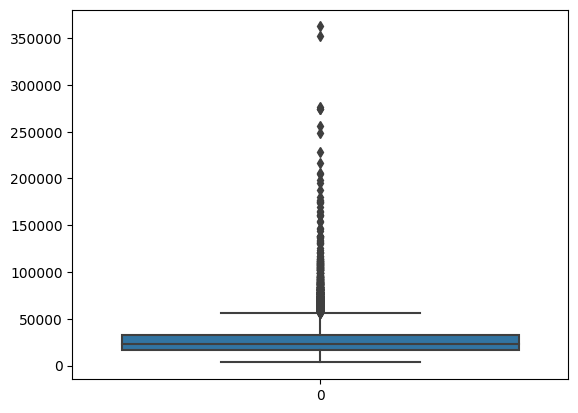

In [139]:
sns.boxplot(df_new_4['total_income'])

Berdasarkan box plot di atas, nilai 'total_income' memiliki banyak outliers, maka sebaiknya nilai yang digunakan adalah median.

In [140]:
#  menulis fungsi untuk mengisi nilai total_income ke tabel baru dengan median dari data yang tidak kosong
def fill_missing_values (dataframe, agg_column, value_column):
    grouped_values = dataframe.groupby(agg_column)[value_column].median().reset_index()
    size = len(grouped_values)
    for i in range (size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        dataframe.loc[(dataframe[agg_column]==group) & (dataframe[value_column].isna()), value_column]=value
    return dataframe

In [141]:
# menerapkan fungsi fill_missing_values
df_new_5 = fill_missing_values(df_new_4, 'dob_years_category', 'total_income')

In [142]:
# menghitung jumlah data hilang pada tabel yang baru
df_new_5.isna().sum()

children                 0
days_employed         2093
dob_years                0
education                0
education_id             0
family_status            0
family_status_id         0
gender                   0
income_type              0
debt                     0
total_income             0
purpose                  0
years_employed        2093
dob_years_category       0
dtype: int64

Tidak terdapat nilai kosong pada kolom `total_income`. Fungsi berhasil diterapkan untuk mengisi nilai yang kosong.

In [143]:
# Periksa apakah kita mendapatkan kesalahan
df_new_5[df_new_5['days_employed'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,dob_years_category
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,22112.445,to have a wedding,NaN,Old-aged Adults
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,24752.294,education,NaN,Middle-aged Adults
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,22112.445,building a real estate,NaN,Old-aged Adults
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,22112.445,second-hand car purchase,NaN,Old-aged Adults
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,22112.445,to have a wedding,NaN,Old-aged Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21316,2,NaN,47,secondary education,1,married,0,M,business,0,22112.445,purchase of a car,NaN,Old-aged Adults
21322,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,22112.445,wedding ceremony,NaN,Old-aged Adults
21324,0,NaN,48,bachelor's degree,0,married,0,F,business,0,22112.445,building a property,NaN,Old-aged Adults
21329,1,NaN,42,secondary education,1,married,0,F,employee,0,24752.294,building a real estate,NaN,Middle-aged Adults


Berdasarkan perhitungan nilai hilang pada kolom 'total_income', dan dengan kondisi 'days_employed'.isna(), tidak ada nilai 'total_income' yang kosong, maka dianggap tidak ada kesalahan.

###  Memperbaiki nilai di `days_employed`

Jumlah hari bekerja, `days_employed`, akan diisi dengan median atau mean `days_employed` berdasarkan tipe pekerjaan, `income_type`.

In [144]:
# Distribusi median dari `days_employed` berdasarkan parameter yang Anda identifikasi
df_new_5.groupby('income_type')['days_employed'].median()

income_type
business                       1548.009883
civil servant                  2673.404956
employee                       1576.067689
entrepreneur                    520.848083
paternity / maternity leave    3296.759962
retiree                        3651.763368
unemployed                     3375.244668
Name: days_employed, dtype: float64

In [145]:
# Distribusi rata-rata dari `days_employed` berdasarkan parameter yang Anda identifikasi
df_new_5.groupby('income_type')['days_employed'].mean()

income_type
business                       2112.744402
civil servant                  3388.508552
employee                       2328.603723
entrepreneur                    520.848083
paternity / maternity leave    3296.759962
retiree                        3650.157276
unemployed                     2635.674869
Name: days_employed, dtype: float64

<Axes: >

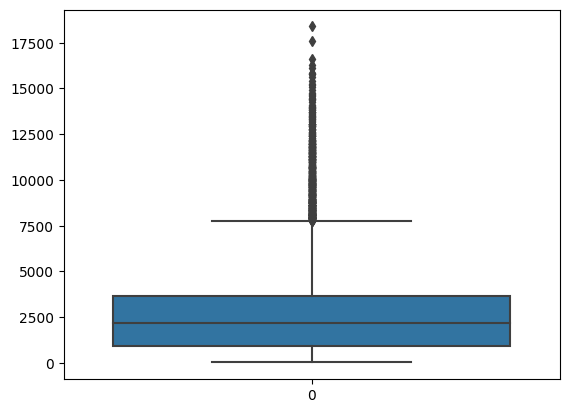

In [146]:
sns.boxplot(df_new_5['days_employed'])

Berdasarkan box plot di atas, nilai di kolom 'days_employed' memiliki banyak outliers, maka diputuskan sebaiknya menggunakan nilai median untuk mengisi nilai yang hilang.

In [147]:
# menerapkan fungsi fill_missing_values ke income_type
df_new_5 = fill_missing_values(df_new_5, 'income_type', 'days_employed')

In [148]:
# memeriksa kembali jumlah data yang hilang
df_new_5.isna().sum()

children                 0
days_employed            0
dob_years                0
education                0
education_id             0
family_status            0
family_status_id         0
gender                   0
income_type              0
debt                     0
total_income             0
purpose                  0
years_employed        2093
dob_years_category       0
dtype: int64

Nilai pada kolom `days_employed` sudah terisi, tidak ada data yang kosong.

### Mengisi Nilai Hilang pada Kolom `years_employed`

Karena nilai pada `days_employed` sudah terisi semua, maka nilai kosong pada `years_employed` dapat diisi.

In [149]:
# mengisi nilai yang hilang
df_new_5['years_employed']=df_new_5['days_employed']/365
df_new_5.isna().sum()

children              0
days_employed         0
dob_years             0
education             0
education_id          0
family_status         0
family_status_id      0
gender                0
income_type           0
debt                  0
total_income          0
purpose               0
years_employed        0
dob_years_category    0
dtype: int64

## Mengganti Tipe Data pada `days_employed` Menjadi Integer

In [150]:
df_new_5['days_employed'] = df_new_5['days_employed'].astype(int)
df_new_5.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,dob_years_category
0,1,8437,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,23.116912,Middle-aged Adults
1,1,4024,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,11.026860,Middle-aged Adults
2,0,5623,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,15.406637,Middle-aged Adults
3,3,4124,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,11.300677,Middle-aged Adults
4,0,3402,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,9.322358,Old-aged Adults


In [151]:
df_new_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21352 entries, 0 to 21351
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   children            21352 non-null  int64  
 1   days_employed       21352 non-null  int64  
 2   dob_years           21352 non-null  int64  
 3   education           21352 non-null  object 
 4   education_id        21352 non-null  int64  
 5   family_status       21352 non-null  object 
 6   family_status_id    21352 non-null  int64  
 7   gender              21352 non-null  object 
 8   income_type         21352 non-null  object 
 9   debt                21352 non-null  int64  
 10  total_income        21352 non-null  float64
 11  purpose             21352 non-null  object 
 12  years_employed      21352 non-null  float64
 13  dob_years_category  21352 non-null  object 
dtypes: float64(2), int64(6), object(6)
memory usage: 2.3+ MB


Tipe data `days_employed` sudah diganti menjadi integer.

## Pengkategorian Data

### Pengkategorian Tujuan Kredit

In [152]:
# menampilkan kolom purpose untuk pengkategorian
df_new_5['purpose']

0          purchase of the house
1                   car purchase
2          purchase of the house
3        supplementary education
4              to have a wedding
                  ...           
21347       housing transactions
21348          purchase of a car
21349                   property
21350          buying my own car
21351               to buy a car
Name: purpose, Length: 21352, dtype: object

In [153]:
# menampilkan nilai unik dari kolom purpose
sorted(df_new_5['purpose'].unique())

['building a property',
 'building a real estate',
 'buy commercial real estate',
 'buy real estate',
 'buy residential real estate',
 'buying a second-hand car',
 'buying my own car',
 'buying property for renting out',
 'car',
 'car purchase',
 'cars',
 'construction of own property',
 'education',
 'getting an education',
 'getting higher education',
 'going to university',
 'having a wedding',
 'housing',
 'housing renovation',
 'housing transactions',
 'profile education',
 'property',
 'purchase of a car',
 'purchase of my own house',
 'purchase of the house',
 'purchase of the house for my family',
 'real estate transactions',
 'second-hand car purchase',
 'supplementary education',
 'to become educated',
 'to buy a car',
 'to get a supplementary education',
 'to have a wedding',
 'to own a car',
 'transactions with commercial real estate',
 'transactions with my real estate',
 'university education',
 'wedding ceremony']

Kelompok utamanya adalah **real estate, car, education, wedding.**



In [154]:
# Mari kita tulis sebuah fungsi untuk mengategorikan data berdasarkan topik umum
def categorize_purpose(row):
            if 'car' in row:
                return 'car'
            elif 'hous' in row or 'prop' in row or 'real est' in row:
                return 'real estate'
            elif 'wedd' in row:
                return 'wedding'
            elif 'educ' in row or 'uni' in row:
                return 'education'
            else:
                return 'Unidentified'

In [155]:
# menerapkan fungsi ke kolom purpose
df_new_5['purpose'].apply(categorize_purpose)

0        real estate
1                car
2        real estate
3          education
4            wedding
            ...     
21347    real estate
21348            car
21349    real estate
21350            car
21351            car
Name: purpose, Length: 21352, dtype: object

In [156]:
# menerapkan fungsi dan menyimpannya ke kolom purpose_category
df_new_5['purpose_category'] = df_new_5['purpose'].apply(categorize_purpose)
df_new_5['purpose_category'].value_counts()

real estate    10763
car             4284
education       3995
wedding         2310
Name: purpose_category, dtype: int64

### Pengkategorian Tingkat Pendapatan

In [157]:
# menampilkan kolom total_income untuk pengkategorian
df_new_5['total_income']

0        40620.102
1        17932.802
2        23341.752
3        42820.568
4        25378.572
           ...    
21347    35966.698
21348    24959.969
21349    14347.610
21350    39054.888
21351    13127.587
Name: total_income, Length: 21352, dtype: float64

Karena nilai `total_income` berbeda dan memiliki rentang yang panjang, pengkategoriannya dibagi berdasarkan kuartil.

In [158]:
# menerapkan cara ke kolom total_income
pd.qcut(df_new_5['total_income'],
       q=3,
       labels= ['small income',
               'medium income',
               'high income'])

0          high income
1         small income
2        medium income
3          high income
4        medium income
             ...      
21347      high income
21348    medium income
21349     small income
21350      high income
21351     small income
Name: total_income, Length: 21352, dtype: category
Categories (3, object): ['small income' < 'medium income' < 'high income']

In [159]:
# menerapkan cara ke kolom total_income dan menyimpan hasilnya ke kolom total_income_category
df_new_5['total_income_category'] = pd.qcut(df_new_5['total_income'],
       q=3,
       labels= ['small income',
               'medium income',
               'high income'])

In [160]:
# menampilkan distribusi kategori total_income
df_new_5['total_income_category'].value_counts()

small income     7118
medium income    7117
high income      7117
Name: total_income_category, dtype: int64

Pendapatan sudah berhasil dikategorikan menjadi small income, medium income dan high income.

# Menguji hipotesis


## Jumlah Anak Mempengaruhi Kemampuan Nasabah untuk Membayar Pinjaman.

In [161]:
# jumlah nasabah lancar bayar pinjaman dan pernah gagal bayar pinjaman berdasarkan jumlah anak
df_new_5.groupby('debt')['children'].value_counts()

debt  children
0     0           12963
      1            4397
      2            1912
      3             301
      4              37
      5               9
1     0            1058
      1             442
      2             202
      3              27
      4               4
Name: children, dtype: int64

In [162]:
# probabilitas lancar bayar pinjaman berdasarkan jumlah anak
children_debt_0 = df_new_5[df_new_5['debt']==0]['children'].value_counts()
children_debt_1 = df_new_5[df_new_5['debt']==1]['children'].value_counts()
children_debt_0/(children_debt_0+children_debt_1)

0    0.924542
1    0.908659
2    0.904447
3    0.917683
4    0.902439
5         NaN
Name: children, dtype: float64

### Temuan

- Lebih banyak jumlah nasabah yang lancar bayar pinjaman (debt=0) dibanding yang pernah gagal bayar pinjaman (debt=1).
- Angka probabilitas tertinggi terletak pada kondisi jumlah anak 0 (tanpa anak), yaitu 0,924542.
- Angka probabilitas terendah terletak pada kondisi jumlah anak 4, yaitu 0,902439.  
- Pada kondisi memiliki anak, hanya kondisi jumlah anak 3 yang memiliki probabilitas cukup tinggi, mendekati probabilitas jumlah anak 0, yaitu 0,917683.
- Antara jumlah anak 1 dan jumlah anak 2, angka probabilitasnya lebih tinggi jumlah anak 1.

### Kesimpulan
- Semakin sedikit jumlah anak, semakin besar kemungkinan untuk lancar membayar pinjaman.
- Semakin banyak jumlah anak, semakin kecil kemungkinan untuk lancar membayar pinjaman.

## Status Pernikahan Mempengaruhi Kemungkinan Lancar Bayar Pinjaman

In [163]:
# jumlah nasabah lancar bayar pinjaman dan pernah gagal bayar pinjaman berdasarkan status pernikahan
df_new_5.groupby('debt')['family_status'].value_counts()

debt  family_status    
0     married              11363
      civil partnership     3743
      unmarried             2521
      divorced              1100
      widow / widower        892
1     married                927
      civil partnership      386
      unmarried              273
      divorced                85
      widow / widower         62
Name: family_status, dtype: int64

In [164]:
# probabilitas lancar bayar pinjaman berdasarkan status pernikahan
family_debt_0 = df_new_5[df_new_5['debt']==0]['family_status'].value_counts()
family_debt_1 = df_new_5[df_new_5['debt']==1]['family_status'].value_counts()
family_debt_0/(family_debt_0+family_debt_1)

married              0.924573
civil partnership    0.906515
unmarried            0.902291
divorced             0.928270
widow / widower      0.935010
Name: family_status, dtype: float64

### Temuan
- Lebih banyak jumlah nasabah yang lancar bayar pinjaman (debt=0) dibanding yang pernah gagal bayar pinjaman (debt=1).
- Angka probabilitas tertinggi terletak pada kondisi widow/ widower, kemudian divorced, kemudian married, kemudian civil partnership, kemudian unmarried.

### *Insights*
- Nasabah dengan kondisi unmarried memiliki probabilitas terendah kemungkinan karena tidak ada yang dapat membantunya membayar pinjaman.
- Nasabah dengan kondisi menikah atau pernah menikah (married, divorced, widow/ widower) memiliki probabilitas lebih tinggi dibanding yang tidak menikah (civil partnership, unmarried).

### Kesimpulan
- Status pernikahan mempengaruhi probabilitas lancar pinjaman. Ketika seorang nasabah berstatus unmarried, dia memiliki probabilitas paling rendah untuk lancar bayar pinjaman.

## Tingkat Pendapatan Mempengaruhi Kemungkinan Lancar Bayar Pinjaman

In [165]:
# jumlah nasabah lancar bayar pinjaman dan pernah gagal bayar pinjaman berdasarkan kategori pendapatan
df_new_5.groupby('debt')['total_income_category'].value_counts()

debt  total_income_category
0     high income              6577
      small income             6540
      medium income            6502
1     medium income             615
      small income              578
      high income               540
Name: total_income_category, dtype: int64

In [166]:
# probabilitas lancar bayar pinjaman berdasarkan kategori pendapatan
income_debt_0 = df_new_5[df_new_5['debt']==0]['total_income_category'].value_counts()
income_debt_1 = df_new_5[df_new_5['debt']==1]['total_income_category'].value_counts()
income_debt_0/(income_debt_0+income_debt_1)

small income     0.918797
medium income    0.913587
high income      0.924125
Name: total_income_category, dtype: float64

### Temuan
- Lebih banyak jumlah nasabah yang lancar bayar pinjaman (debt=0) dibanding yang pernah gagal bayar pinjaman (debt=1).
- Angka probabilitas tertinggi terletak pada kondisi widow/ widower, kemudian divorced, kemudian married, kemudian civil partnership, kemudian unmarried.

### Kesimpulan
- Semakin tinggi pendapatan, semakin besar kemungkinan untuk lancar bayar pinjaman.

## Tujuan Pinjaman Mempengaruhi Kemungkinan Lancar Bayar Pinjaman

In [167]:
# Periksa persentase tingkat gagal bayar untuk setiap tujuan kredit dan lakukan penganalisisan
df_new_5.groupby('debt')['purpose_category'].value_counts(normalize=True) *100

debt  purpose_category
0     real estate         50.889444
      car                 19.797135
      education           18.476987
      wedding             10.836434
1     real estate         44.950952
      car                 23.081362
      education           21.350260
      wedding             10.617426
Name: purpose_category, dtype: float64

In [168]:
# probabilitas lancar bayar pinjaman berdasarkan kategori tujuan pinjaman
purpose_debt_0 = df_new_5[df_new_5['debt']==0]['purpose_category'].value_counts()
purpose_debt_1 = df_new_5[df_new_5['debt']==1]['purpose_category'].value_counts()
purpose_debt_0/(purpose_debt_0+purpose_debt_1)

real estate    0.927622
car            0.906629
education      0.907384
wedding        0.920346
Name: purpose_category, dtype: float64

### Temuan
- Lebih banyak jumlah nasabah yang lancar bayar pinjaman (debt=0) dibanding yang pernah gagal bayar pinjaman (debt=1).
- Angka probabilitas tertinggi terletak pada real estate, kemudian wedding, kemudian education, kemudian car.

### Kesimpulan
- Pinjaman dengan tujuan real estate memiliki probabilitas tertinggi untuk lancar membayar pinjaman.

# Kesimpulan Umum

- Jumlah anak mempengaruhi kemungkinan lancar bayar pinjaman. Semakin sedikit jumlah anak, semakin besar kemungkinan untuk lancar membayar pinjaman.
- Status pernikahan mempengaruhi probabilitas lancar pinjaman. Ketika seorang nasabah berstatus unmarried, dia memiliki probabilitas paling rendah untuk lancar bayar pinjaman.
- Semakin tinggi pendapatan, semakin besar kemungkinan untuk lancar bayar pinjaman.
- Pinjaman dengan tujuan real estate memiliki probabilitas tertinggi untuk lancar membayar pinjaman.